In [12]:
# general imports
import json
import time
import sys
import random

# drawing imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

UsageError: unrecognized arguments: # type: ignore


In [13]:
# path variables
# set paths here and you're good to go...

# directory containing coco-a annotations
COCOA_DIR = '/D_data/Seg/data/cocoa/annotations'
# coco-a json file
COCOA_ANN = 'cocoa_beta2015.json'
# directory containing VisualVerbnet
VVN_DIR = '/D_data/Seg/data/cocoa/annotations'
# vvn json file
VVN_ANN = 'visual_verbnet_beta2015.json'
# directory containing the MS COCO images
COCO_IMG_DIR = '/D_data/Seg/data/coco/images'
# directory containing the MS COCO Python API
COCO_API_DIR = '/D_data/Seg/cocoapi/PythonAPI'
# directory containing the MS COCO annotations
COCO_ANN_DIR = '/D_data/Seg/data/coco/annotations'


In [14]:
# load cocoa annotations

print("Loading COCO-a annotations...")
tic = time.time()

with open("{0}/{1}".format(COCOA_DIR,COCOA_ANN)) as f:
    cocoa = json.load(f)

# annotations with agreement of at least 1 mturk annotator
cocoa_1 = cocoa['annotations']['1']
# annotations with agreement of at least 2 mturk annotator
cocoa_2 = cocoa['annotations']['2']
# annotations with agreement of at least 3 mturk annotator
cocoa_3 = cocoa['annotations']['3']

print("Done, (t={0:.2f}s).".format(time.time() - tic))

Loading COCO-a annotations...
Done, (t=1.33s).


In [15]:
# load visual verbnet

print("Loading VisualVerbNet...")
tic = time.time()

with open("{0}/{1}".format(VVN_DIR,VVN_ANN)) as f:
    vvn = json.load(f)

# list of 145 visual actions contained in VVN
visual_actions = vvn['visual_actions']
# list of 17 visual adverbs contained in VVN
visual_adverbs = vvn['visual_adverbs']
    
print("Done, (t={0:.2f}s).".format(time.time() - tic))

Loading VisualVerbNet...
Done, (t=0.00s).


In [16]:
# visual actions in VVN by category

# each visual action is a dictionary with the following properties:
#  - id:            unique id within VVN
#  - name:          name of the visual action
#  - category:      visual category as defined in the paper
#  - definition:    [empty]
#                   an english language description of the visual action
#  - verbnet_class: [empty]
#                   corresponding verbnet (http://verbs.colorado.edu/verb-index/index.php) entry id for each visual action

for cat in set([x['category'] for x in visual_actions]):
    print("Visual Category: [{0}]".format(cat))
    for va in [x for x in visual_actions if x['category']==cat]:
        print("\t - id:[{0}], visual_action:[{1}]".format(va['id'],va['name']))

Visual Category: [social]
	 - id:[115], visual_action:[accompany]
	 - id:[116], visual_action:[be_with]
	 - id:[117], visual_action:[chase]
	 - id:[118], visual_action:[dance]
	 - id:[119], visual_action:[dine]
	 - id:[120], visual_action:[dress]
	 - id:[121], visual_action:[feed]
	 - id:[122], visual_action:[fight]
	 - id:[123], visual_action:[follow]
	 - id:[124], visual_action:[give]
	 - id:[125], visual_action:[groom]
	 - id:[126], visual_action:[help]
	 - id:[127], visual_action:[hunt]
	 - id:[128], visual_action:[kill]
	 - id:[129], visual_action:[meet]
	 - id:[130], visual_action:[pay]
	 - id:[131], visual_action:[play_baseball]
	 - id:[132], visual_action:[play_basketball]
	 - id:[133], visual_action:[play_frisbee]
	 - id:[134], visual_action:[play_soccer]
	 - id:[135], visual_action:[play_tennis]
	 - id:[136], visual_action:[precede]
	 - id:[137], visual_action:[shake_hands]
	 - id:[138], visual_action:[teach]
Visual Category: [posture]
	 - id:[92], visual_action:[balance]
	 -

In [17]:
# visual adverbs in VVN by category

# each visual adverb is a dictionary with the following properties:
#  - id:            unique id within VVN
#  - name:          name of the visual action
#  - category:      visual category as defined in the paper
#  - definition:    [empty]
#                   an english language description of the visual action

# NOTE: relative_location is the location of the object with respect to the subject.
# It is not with respect to the reference frame of the image.
# i.e. if you where the subject, where is the object with respect to you?

for cat in set([x['category'] for x in visual_adverbs]):
    print("Visual Category: [{0}]".format(cat))
    for va in [x for x in visual_adverbs if x['category']==cat]:
        print("\t - id:[{0}], visual_adverb:[{1}]".format(va['id'],va['name']))

Visual Category: [emotion]
	 - id:[1], visual_adverb:[anger]
	 - id:[2], visual_adverb:[disgust]
	 - id:[3], visual_adverb:[fear]
	 - id:[4], visual_adverb:[happiness]
	 - id:[5], visual_adverb:[neutral]
	 - id:[6], visual_adverb:[sadness]
	 - id:[7], visual_adverb:[surprise]
Visual Category: [distance]
	 - id:[14], visual_adverb:[far]
	 - id:[15], visual_adverb:[full_contact]
	 - id:[16], visual_adverb:[light_contact]
	 - id:[17], visual_adverb:[near]
Visual Category: [location]
	 - id:[8], visual_adverb:[above]
	 - id:[9], visual_adverb:[behind]
	 - id:[10], visual_adverb:[below]
	 - id:[11], visual_adverb:[in_front]
	 - id:[12], visual_adverb:[left]
	 - id:[13], visual_adverb:[right]


In [18]:
# each annotation in cocoa is a dictionary with the following properties:

#  - id:             unique id within coco-a
#  - image_id:       unique id of the image from the MS COCO dataset
#  - object_id:      unique id of the object from the MS COCO dataset
#  - subject_id:     unique id of the subject from the MS COCO dataset
#  - visual_actions: list of visual action ids performed by the subject (with the object if present)
#  - visual_adverbs: list of visual adverb ids describing the subject (and object interaction if present)
print("="*30)

# find all interactions between any subject and any object in an image
image_id = 516931
print("image_interactions", image_id)
image_interactions = [x for x in cocoa_2 if x['image_id']==image_id]
print(image_interactions)
print("="*30)

# find all interactions of a subject with any object
subject_id = 190190
print("subject_interactions", subject_id)
# NOTE: In this image there is no interaction with guitar cause it is not annotated in MS COCO
subject_interactions = [x for x in cocoa_2 if x['subject_id']==subject_id]
print(subject_interactions)
print("="*30)

# find interactions of all subjects with an object
object_id = 304500
print("object_interactions", object_id)
object_interactions = [x for x in cocoa_2 if x['object_id']==object_id]
print(object_interactions)
print("="*30)

# find all interactions containing a certain visual action
va_name = 'play_instrument'
print("interactions", va_name)
va_id   = [x for x in visual_actions if x['name']==va_name][0]['id']
interactions = [x for x in cocoa_2 if va_id in x['visual_actions']]
print(interactions)
print("="*30)

image_interactions 516931
[{'visual_adverbs': [4], 'subject_id': 424258, 'object_id': -1, 'image_id': 516931, 'visual_actions': [109, 156], 'id': 822145749}, {'visual_adverbs': [17, 9], 'subject_id': 424258, 'object_id': 440510, 'image_id': 516931, 'visual_actions': [116], 'id': 898004752}, {'visual_adverbs': [15, 10], 'subject_id': 424258, 'object_id': 640623, 'image_id': 516931, 'visual_actions': [29, 91, 75], 'id': 771325559}, {'visual_adverbs': [17, 11], 'subject_id': 440510, 'object_id': 424258, 'image_id': 516931, 'visual_actions': [88, 115, 117], 'id': 313937370}, {'visual_adverbs': [16, 13], 'subject_id': 440510, 'object_id': 1995427, 'image_id': 516931, 'visual_actions': [91, 57], 'id': 86762482}, {'visual_adverbs': [4], 'subject_id': 440510, 'object_id': -1, 'image_id': 516931, 'visual_actions': [114, 147], 'id': 377702020}]
subject_interactions 190190
[{'visual_adverbs': [17, 11], 'subject_id': 190190, 'object_id': 28870, 'image_id': 332176, 'visual_actions': [88], 'id': 488

In [19]:
# coco-a is organized to be easily integrable with MS COCO

# load coco annotations
ANN_FILE_PATH = "{0}/instances_{1}.json".format(COCO_ANN_DIR,'train2014')

if COCO_API_DIR not in sys.path:
    sys.path.append( COCO_API_DIR )
from pycocotools.coco import COCO

coco = COCO( ANN_FILE_PATH )

loading annotations into memory...
Done (t=11.46s)
creating index...
index created!


In [21]:
# visualize an image with subject and object
# and print the interaction annotations

# object_id == -1 means that the annotation is describing a subject and not an interaction
interaction  = random.choice([x for x in cocoa_2 if x['object_id']!=-1 if len(x['visual_actions'])>2])

interaction_id = interaction['id']
image_id       = interaction['image_id']

subject_id     = interaction['subject_id']
subject_anns   = coco.loadAnns(subject_id)[0]

object_id      = interaction['object_id']
object_anns    = coco.loadAnns(object_id)[0]
object_cat     = coco.cats[object_anns['category_id']]['name']

v_actions      = interaction['visual_actions']
v_adverbs      = interaction['visual_adverbs']

print("Interaction ID:  [{0}]".format(interaction_id))
print("Image ID:        [{0}]".format(image_id))
print("Subject ID:      [{0}]".format(subject_id))
print("Object ID:       [{0}], Category: [{1}]".format(object_id,object_cat))

print("\nVisual Actions:")
for va_id in v_actions:
    va = [x for x in visual_actions if x['id']==va_id][0]
    print("  - id:[{0}], name:[{1}]".format(va['id'],va['name']))

print("\nVisual Adverbs:")
for va_id in v_adverbs:
    va = [x for x in visual_adverbs if x['id']==va_id][0]
    print("  - id:[{0}], name:[{1}]".format(va['id'],va['name']))

img = coco.loadImgs(image_id)[0]
I = io.imread("{0}/{1}/{2}".format(COCO_IMG_DIR,'train2014',img['file_name']))
plt.figure(figsize=(12,8))
plt.imshow(I)
coco.showAnns([subject_anns,object_anns])

Interaction ID:  [991159321]
Image ID:        [59843]
Subject ID:      [1721682]
Object ID:       [329343], Category: [cell phone]

Visual Actions:
  - id:[29], name:[hold]
  - id:[88], name:[look]
  - id:[72], name:[read]
  - id:[84], name:[use]

Visual Adverbs:
  - id:[15], name:[full_contact]
  - id:[11], name:[in_front]


NameError: name 'io' is not defined

subject_anns {'segmentation': [[158.2, 342.05, 153.89, 370.82, 128.0, 343.49, 136.63, 297.47, 136.63, 244.25, 140.94, 227.0, 142.38, 208.3, 130.88, 192.48, 140.94, 150.77, 161.08, 123.45, 163.96, 119.13, 152.45, 78.86, 159.64, 57.29, 191.28, 37.15, 209.98, 44.34, 227.24, 58.73, 235.87, 74.55, 235.87, 93.24, 234.43, 106.19, 270.38, 110.5, 300.58, 129.2, 312.09, 165.15, 332.22, 211.18, 337.98, 239.94, 327.91, 284.52, 317.84, 311.85, 312.09, 327.67, 307.78, 353.56, 289.08, 355.0, 279.01, 340.61, 290.52, 320.48, 304.9, 297.47, 291.96, 271.58, 258.88, 222.68, 240.18, 212.61, 208.54, 232.75, 181.21, 260.07, 175.46, 274.46, 181.21, 245.69, 184.09, 232.75, 185.53, 214.05, 185.53, 206.86, 174.02, 199.67, 172.58, 219.81, 169.71, 242.82, 165.39, 268.7, 158.2, 291.72, 156.76, 314.73, 159.64, 327.67]], 'area': 32919.20840000001, 'iscrowd': 0, 'image_id': 352178, 'bbox': [128.0, 37.15, 209.98, 333.67], 'category_id': 1, 'id': 430673}
object_anns {'segmentation': [[199.25, 359.49, 200.12, 329.8, 210.

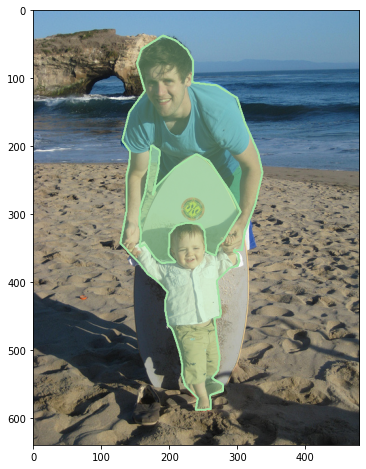

In [ ]:
# Try to merge the subject and object
# Interaction ID: [896683662]
# Image ID:  [335735]
# Subject ID:[421829]
# Object ID: [1459459], Category: [sports ball]
import pycocotools.mask as maskUtils
import numpy as np
import copy
import cv2

# https://zhuanlan.zhihu.com/p/84214563
def mask2polygon(mask):
    contours, hierarchy = cv2.findContours((mask).astype(np.uint8), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    # mask_new, contours, hierarchy = cv2.findContours((mask).astype(np.uint8), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    segmentation = []
    for contour in contours:
        contour_list = contour.flatten().tolist()
        if len(contour_list) > 4:# and cv2.contourArea(contour)>10000
            segmentation.append(contour_list)
    return segmentation

print("="*30)
print("subject_anns", subject_anns)

print("="*30)
print("object_anns", object_anns)

new_subject_anns = copy.deepcopy(subject_anns)
new_subject_anns['segmentation'] += object_anns['segmentation']
# new_subject_anns['segmentation'].append(object_anns['segmentation'])
# new_subject_anns['segmentation'] = np.array(new_subject_anns['segmentation'])


rles = maskUtils.frPyObjects(new_subject_anns['segmentation'], img['height'], img['width'])
rle = maskUtils.merge(rles)

m = maskUtils.decode(rle)
print("="*30)
print("merged mask", m)

new_subject_anns['segmentation'] = mask2polygon(m)
new_subject_anns['area'] = maskUtils.area([rle]).tolist()
new_subject_anns['bbox'] = maskUtils.toBbox([rle]).tolist()

print("="*30)
print("new_subject_anns", new_subject_anns)

plt.figure(figsize=(12,8))
plt.imshow(I)
coco.showAnns([new_subject_anns])